# Read Data

In [ ]:
# reading data into pandas
import pandas as pd

# read data from csv file
df = pd.read_csv('/content/drive/MyDrive/Crop Research Project/Dataset_1.csv')

print(df)


     population  site original_planting_date  ... week harvest_quantity  capacity
0           p_1     1                 1/1/20  ...  NaN              NaN       NaN
1           p_2     1                 1/1/20  ...  NaN              NaN       NaN
2           p_3     1                 1/1/20  ...  NaN              NaN       NaN
3           p_4     1                 1/1/20  ...  NaN              NaN       NaN
4           p_5     1                 1/1/20  ...  NaN              NaN       NaN
...         ...   ...                    ...  ...  ...              ...       ...
2564     p_2565     0               12/29/20  ...  NaN              NaN       NaN
2565     p_2566     0               12/29/20  ...  NaN              NaN       NaN
2566     p_2567     0               12/29/20  ...  NaN              NaN       NaN
2567     p_2568     0               12/29/20  ...  NaN              NaN       NaN
2568     p_2569     0               12/29/20  ...  NaN              NaN       NaN

[2569 rows x 16

In [ ]:
for i in df.groupby('site'):
  print (i)


# Divide Dataset1 based on site

In [ ]:
import pandas as pd
#split dataset into two datasets based on site

data = pd.read_excel("/content/drive/MyDrive/Crop Research Project/AB Dataset_1.xls")
print(data)

rows = data.shape[0]
site_list = []

for i in range(rows):
  temp = data["site"][i]
  if temp not in site_list:
    site_list.append(temp)

for name in site_list:
  new_df = pd.DataFrame()

  for i in range(0,rows):
    if data["site"][i] == name:
      new_df = pd.concat([new_df,data.iloc[[i],:]],axis=0,ignore_index=True)

  new_df.to_excel(str(name) + ".xls", sheet_name=str(name), index=False)


     population  site original_planting_date  ... week harvest_quantity  capacity
0           p_1     1             2020-01-01  ...  NaN              NaN       NaN
1           p_2     1             2020-01-01  ...  NaN              NaN       NaN
2           p_3     1             2020-01-01  ...  NaN              NaN       NaN
3           p_4     1             2020-01-01  ...  NaN              NaN       NaN
4           p_5     1             2020-01-01  ...  NaN              NaN       NaN
...         ...   ...                    ...  ...  ...              ...       ...
2564     p_2565     0             2020-12-29  ...  NaN              NaN       NaN
2565     p_2566     0             2020-12-29  ...  NaN              NaN       NaN
2566     p_2567     0             2020-12-29  ...  NaN              NaN       NaN
2567     p_2568     0             2020-12-29  ...  NaN              NaN       NaN
2568     p_2569     0             2020-12-29  ...  NaN              NaN       NaN

[2569 rows x 16

# Split site0,site1 dataset based on GDUs

In [ ]:
#split site0 based on population gdus
data = pd.read_excel("/content/0.xls")
rows = data.shape[0]
required_gdus_list = []

for i in range(rows):
  temp = data["required_gdus"][i]
  if temp not in required_gdus_list:
    required_gdus_list.append(temp)

for gdus in required_gdus_list:
  new_df = pd.DataFrame()

  for i in range(0,rows):
    if data["required_gdus"][i] == gdus:
      new_df = pd.concat([new_df,data.iloc[[i],:]],axis=0,ignore_index=True)

  new_df.to_excel(str(name) + ".xls", sheet_name=str(gdus), index=False)

In [ ]:
#split site1 based on population gdus
data = pd.read_excel("/content/1.xls")
rows = data.shape[0]
site1_gdus_list = []

for i in range(rows):
  temp = data["required_gdus"][i]
  if temp not in site1_gdus_list:
   site1_gdus_list.append(temp)

for gdus in site1_gdus_list:
  new_df = pd.DataFrame()

  for i in range(0,rows):
    if data["required_gdus"][i] == gdus:
      new_df = pd.concat([new_df,data.iloc[[i],:]],axis=0,ignore_index=True)

  new_df.to_excel("site1 " + str(gdus) + ".xls", sheet_name=str(gdus), index=False)

In [ ]:
df=pd.read_excel("/content/0.xls")
df

,population,site,original_planting_date,early_planting_date,late_planting_date,required_gdus,scenario_1_harvest_quantity (number of ears),scenario_2_harvest_quanitity (number of ears),Unnamed: 8,population.1,scenario,Planting site either 0 or 1,planting_date,week,harvest_quantity,capacity
0,p_56,0,2020-01-02,2020-01-01,2020-02-27,1259,270,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p_57,0,2020-01-02,2020-01-01,2020-02-20,1259,389,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p_58,0,2020-01-02,2020-01-01,2020-02-27,1259,249,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p_59,0,2020-01-02,2020-01-01,2020-02-13,1356,100,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p_60,0,2020-01-02,2020-01-01,2020-02-13,1356,296,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,p_2565,0,2020-12-29,2020-12-29,2021-02-16,1056,279,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,p_2566,0,2020-12-29,2020-12-15,2021-02-16,1159,271,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,p_2567,0,2020-12-29,2020-12-15,2021-02-16,1056,314,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,p_2568,0,2020-12-29,2020-12-15,2021-02-09,1159,346,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Forecasting Gdus

In [ ]:
#Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part1: Explore the Data

In [ ]:
# Import the dataset
import pandas as pd  
data = pd.read_csv('/content/drive/MyDrive/Crop Research Project/Dataset_2.csv',parse_dates=["date"]).drop(["Forecast(GDUs for site_0)","Lower Confidence Bound(GDUs for site_0)","Upper Confidence Bound(GDUs for site_0)"],axis =1)

#check the shape of the dataset
print(data.shape)

(5022, 2)


In [ ]:
data.head(10)

,date,GDUs for site_0
0,2009-01-01,11.438115
1,2009-01-02,11.603950
2,2009-01-03,11.606865
3,2009-01-04,11.917281
4,2009-01-05,12.283949
5,2009-01-06,12.670198
6,2009-01-07,12.495617
7,2009-01-08,12.606867
8,2009-01-09,12.089366
9,2009-01-10,11.831865


In [ ]:
#select the subset data from 2016 to 2019
Selected_Gdu=(data['date']>='2009-01-01') & (data['date']<='2019-12-31')
data = data.loc[Selected_Gdu]

#Reset the index
data.set_index('date',inplace=True)
data.head(5)

,GDUs for site_0
date,
2009-01-01,11.438115
2009-01-02,11.603950
2009-01-03,11.606865
2009-01-04,11.917281
2009-01-05,12.283949


In [ ]:
data.tail(5)

,GDUs for site_0
date,
2019-12-27,11.799784
2019-12-28,11.711865
2019-12-29,12.456031
2019-12-30,12.135616
2019-12-31,11.876866


In [ ]:
data.describe()

,GDUs for site_0
count,4017.000000
mean,8.725774
std,3.139695
min,2.078188
25%,5.870616
50%,8.347700
75%,11.503116
max,16.148949


In [ ]:
print(data.loc[data['GDUs for site_0'] == data['GDUs for site_0'].max()])
print(data.loc[data['GDUs for site_0'] == data['GDUs for site_0'].min()])

            GDUs for site_0
date                       
2017-02-27        16.148949
            GDUs for site_0
date                       
2017-09-15         3.164366


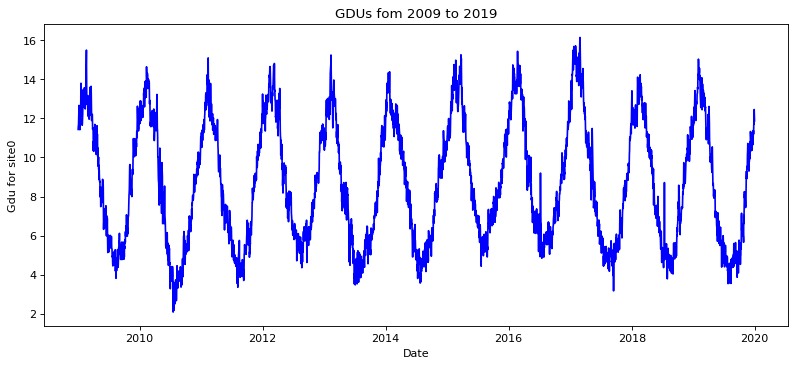

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5),dpi=80)
plt.plot(data.index,data['GDUs for site_0'],color='blue')
plt.gca().set(title='GDUs fom 2009 to 2019', xlabel='Date',ylabel='Gdu for site0')
plt.show()

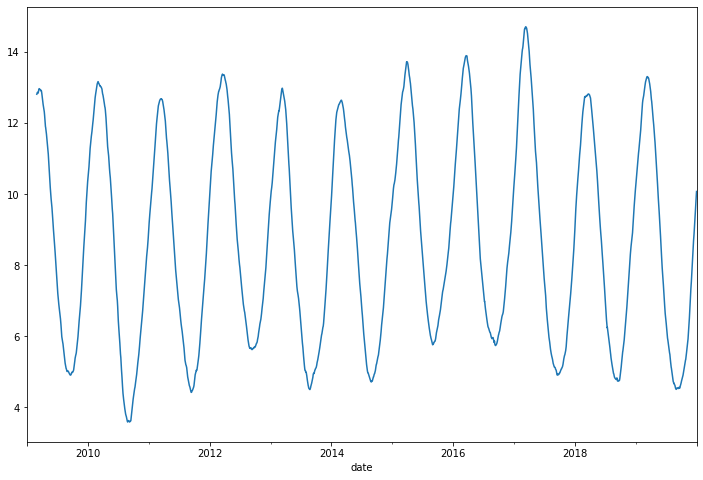

In [ ]:
# time series forecasting, to make the plot more neat by smoothing and applying a larger window
#apply the moving average function by a subset of a size 30 days
data_mean = data['GDUs for site_0'].rolling(window = 60).mean()
data_mean.plot(figsize=(12,8))

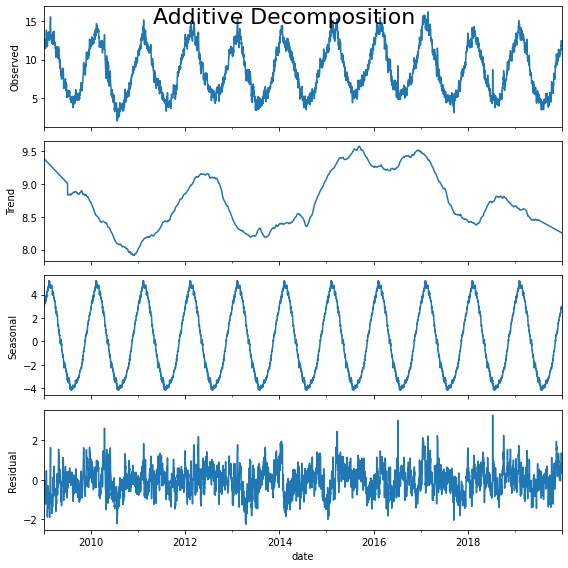

In [ ]:
#Additive time series:
#value = base level + trend + seasonality + error
from statsmodels.tsa.seasonal import seasonal_decompose
de_data=seasonal_decompose(data['GDUs for site_0'],model='additive',extrapolate_trend='freq',freq=365)
plt.rcParams.update({'figure.figsize':(8,8)})
de_data.plot().suptitle('Additive Decomposition',fontsize=22)
plt.show()

# Part2: Forecasting Model

## A Baseline Model

In [ ]:
#predicted the day of Gdu based on yesterday's Gdu
#shift the current temperature to the next day
predicted_Gdu = data['GDUs for site_0'].to_frame().shift(1).rename(columns = {'GDUs for site_0':'GDUs_0_pred'})
actual_Gdu = data['GDUs for site_0'].to_frame().rename(columns = {'GDUs for site_0':'GDUs_0_actual'})

#Concatenate the actual and predicted temperature
one_step_data = pd.concat([actual_Gdu,predicted_Gdu],axis = 1)

data1 = one_step_data[1:]
data1.tail(10)


,GDUs_0_actual,GDUs_0_pred
date,,
2019-12-22,10.658115,10.827700
2019-12-23,11.170616,10.658115
2019-12-24,11.390198,11.170616
2019-12-25,11.193533,11.390198
2019-12-26,11.440200,11.193533
2019-12-27,11.799784,11.440200
2019-12-28,11.711865,11.799784
2019-12-29,12.456031,11.711865
2019-12-30,12.135616,12.456031


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
from math import sqrt


RMSE = sqrt(MSE(data1['GDUs_0_actual'],data1['GDUs_0_pred']))
RMSE

0.44876290252664003

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(data1['GDUs_0_actual'],data1['GDUs_0_pred'])
MAE

0.3449293023904383

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
MAPE = mape(data1['GDUs_0_actual'],data1['GDUs_0_pred'])
print(MAPE,'%')

4.543322405567523 %


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(data1['GDUs_0_actual'],data1['GDUs_0_pred'])
MAPE

# LSTM Model

## ARIMA Model
ARIMA is composed of 3 terms(Auto-Regression + Integrated+Moving-Average)

AR: Y(t)= Some_Constant*Y(t-1)+ Another_Constant +Error(t)
MA：Y(t)= Mean + Some_Constant*Error(t-1) +Error(t)

So our main job is to decide the order of the AR, I, MA parts which are donated by(p,d,q) respectively.ARIMA(p,d,q)


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 9.8 MB 43.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd  
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Crop Research Project/Dataset_2.csv',parse_dates=['date']).drop(["Forecast(GDUs for site_0)","Lower Confidence Bound(GDUs for site_0)","Upper Confidence Bound(GDUs for site_0)"],axis =1)

#check the shape of the dataset
print(data.shape)

#select the subset data from 2015 to 2019
Selected_Gdu=(data['date']>='2015-01-01') & (data['date']<='2019-12-31')
data = data.loc[Selected_Gdu]

#Reset the index
data.set_index('date',inplace=True)
data.head(5)

FileNotFoundError: ignored

In [ ]:
#Check For Stationarity of Gdu
#If p< 0.05 ; Data is stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)


In [ ]:
adf_test(data['GDUs for site_0'])

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(data['GDUs for site_0'], 
                          suppress_warnings=True)           

stepwise_fit.summary()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#Split the data into training(80%) and testing(20%) sets
#all_index = np.array(data.index)
#train_index = np.random.choice(all_index,size=int(len(all_index)*0.8),replace=False)
#test_index = np.setdiff1d(all_index,train_index)
#train_data = data.loc[train_index,]
#test_data = data.loc[test_index,]
#print(train_data.shape,test_data.shape)

In [ ]:
#split the dataset into train and test
train_data=data.iloc[:-31]
test_data=data.iloc[-31:]
print(train_data.shape,test_data.shape)
print(test_data.iloc[0],test_data.iloc[-1])

In [ ]:
#Train Model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['GDUs for site_0'],order=(0,1,2))
model=model.fit()
model.summary()

In [ ]:
#prediction on test dataset
#first predict yhat, and then real y-yhat
pred= model.predict(start=len(train_data),end=len(train_data)+31,typ='levels').rename('ARIMA predictions')

pred.plot(legend=True)
test_data['GDUs for site_0'].plot(legend=True)

# SARIMA Model

In [ ]:
import itertools

p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1['GDUs_0_actual'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data1['GDUs_0_actual'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4589      0.042     11.021      0.000       0.377       0.540
ma.L1         -0.6615      0.037    -18.073      0.000      -0.733      -0.590
ar.S.L12       0.0236      0.015      1.527      0.127      -0.007       0.054
ma.S.L12      -1.0050      0.005   -216.590      0.000      -1.014      -0.996
sigma2         0.1903      0.003     65.436      0.000       0.185       0.196


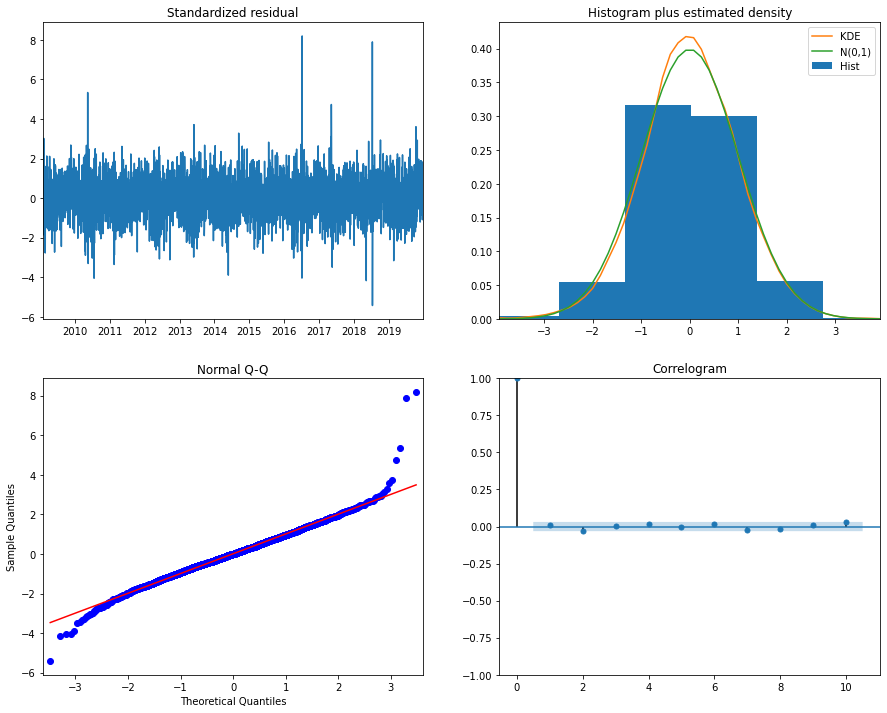

In [ ]:
import matplotlib.pyplot as plt
results.plot_diagnostics(figsize=(15, 12))

plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()


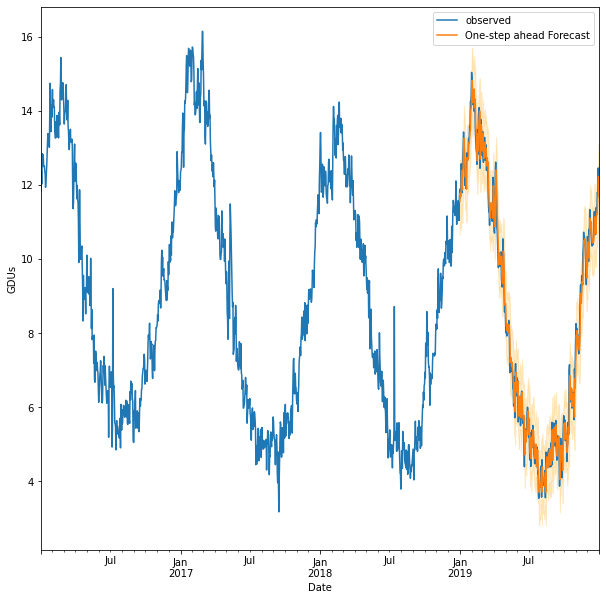

In [ ]:
ax = data1.GDUs_0_actual['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color= 'orange', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GDUs')
plt.legend()

plt.show()

In [ ]:
y_hat = pred.predicted_mean
y = data1.GDUs_0_actual['2016-01-01':]

# Compute the mean square error
#from sklearn.metrics import mean_squared_error as MSE
mse = ((y - y_hat) ** 2).mean()
rmse = sqrt(mse)
rmse

0.4303981095152861

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

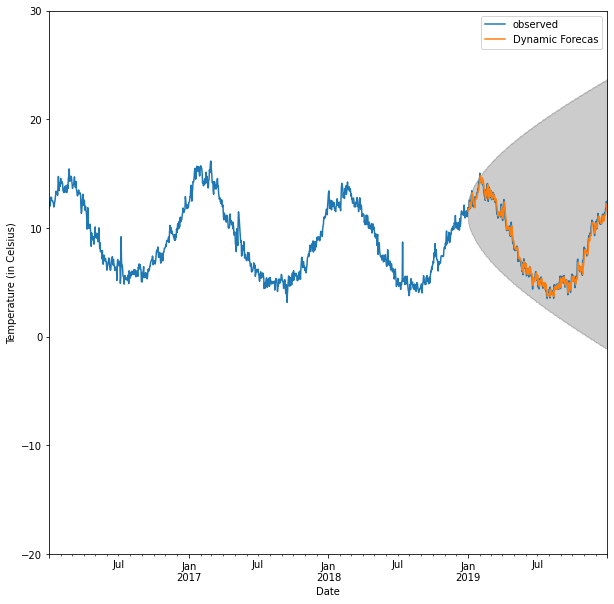

In [ ]:
ax = data1.GDUs_0_actual['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Dynamic Forecast')

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = data1.GDUs_0_actual['2019-01-01':]


# Compute the mean square error
rmse = sqrt(MSE(y_truth, y_forecasted).mean())
rmse

4.406687583527805